### IBM - Data Science - Capstone Project Notebook

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import display_html
import folium 
import datetime as dt
import dateutil.relativedelta
import calendar
import time


### Foursquare constants and Functions

In [3]:
# Four Square Constants
CLIENT_ID = 'Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ' # your Foursquare ID
CLIENT_SECRET = 'OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
RADIUS = 5000


In [4]:
# List of international cuisines (extracted from https://developer.foursquare.com/docs/build-with-foursquare/categories/)
CUISINES = {
    'Afghan': '503288ae91d4c4b30a586d67', 
    'African': '4bf58dd8d48988d1c8941735', 
    'American': '4bf58dd8d48988d14e941735', 
    'Burmese': '56aa371be4b08b9a8d573568', 
    'Cambodian': '52e81612bcbc57f1066b7a03', 
    'Chinese': '4bf58dd8d48988d145941735', 
    'Filipino': '4eb1bd1c3b7b55596b4a748f', 
    'Himalayan': '52e81612bcbc57f1066b79fb', 
    'Indonesian': '4deefc054765f83613cdba6f', 
    'Japanese': '4bf58dd8d48988d111941735', 
    'Korean': '4bf58dd8d48988d113941735', 
    'Malay': '4bf58dd8d48988d156941735', 
    'Mongolian': '4eb1d5724b900d56c88a45fe', 
    'Thai': '4bf58dd8d48988d149941735', 
    'Tibetan': '52af39fb3cf9994f4e043be9', 
    'Vietnamese': '4bf58dd8d48988d14a941735', 
    'Australian': '4bf58dd8d48988d169941735', 
    'Austrian': '52e81612bcbc57f1066b7a01', 
    'Bangladeshi': '5e179ee74ae8e90006e9a746', 
    'Belgian': '52e81612bcbc57f1066b7a02', 
    'Caribbean': '4bf58dd8d48988d144941735', 
    'Caucasian': '5293a7d53cf9994f4e043a45', 
    'Czech': '52f2ae52bcbc57f1066b8b81', 
    'Dutch': '5744ccdfe4b0c0459246b4d0', 
    'Belarusian': '52e928d0bcbc57f1066b7e97', 
    'Bosnian': '58daa1558bbb0b01f18ec1ee', 
    'Bulgarian': '56aa371be4b08b9a8d5734f3', 
    'Romanian': '52960bac3cf9994f4e043ac4', 
    'Tatar': '52e928d0bcbc57f1066b7e98', 
    'English': '52e81612bcbc57f1066b7a05', 
    'French': '4bf58dd8d48988d10c941735', 
    'German': '4bf58dd8d48988d10d941735', 
    'Greek': '4bf58dd8d48988d10e941735', 
    'Hawaiian': '52e81612bcbc57f1066b79fe', 
    'Hungarian': '52e81612bcbc57f1066b79fa', 
    'Indian': '4bf58dd8d48988d10f941735', 
    'Italian': '4bf58dd8d48988d110941735', 
    'Salvadoran': '5745c7ac498e5d0483112fdb', 
    'Argentinian': '4bf58dd8d48988d107941735', 
    'Brazilian': '4bf58dd8d48988d16b941735', 
    'Colombian': '58daa1558bbb0b01f18ec1f4', 
    'Peruvian': '4eb1bfa43b7b52c0e1adc2e8', 
    'Venezuelan': '56aa371be4b08b9a8d573558', 
    'Moroccan': '4bf58dd8d48988d1c3941735', 
    'Mexican': '4bf58dd8d48988d1c1941735', 
    'Egyptian': '5bae9231bedf3950379f89e1', 
    'Iraqi': '5bae9231bedf3950379f89e7', 
    'Israeli': '56aa371be4b08b9a8d573529', 
    'Kurdish': '5744ccdfe4b0c0459246b4ca', 
    'Lebanese': '58daa1558bbb0b01f18ec1cd', 
    'Persian': '52e81612bcbc57f1066b79f7', 
    'Syrian': '5bae9231bedf3950379f89da', 
    'Yemeni': '5bae9231bedf3950379f89ea', 
    'Pakistani': '52e81612bcbc57f1066b79f8', 
    'Polish': '52e81612bcbc57f1066b7a04', 
    'Portuguese': '4def73e84765ae376e57713a', 
    'Russian': '5293a7563cf9994f4e043a44', 
    'Scandinavian': '4bf58dd8d48988d1c6941735', 
    'Scottish': '5744ccdde4b0c0459246b4a3', 
    'Slovak': '56aa371be4b08b9a8d57355a', 
    'Spanish': '4bf58dd8d48988d150941735', 
    'Sri Lankan': '5413605de4b0ae91d18581a9', 
    'Swiss': '4bf58dd8d48988d158941735', 
    'Turkish': '4f04af1f2fb6e1c99f3db0bb', 
    'Ukranian': '52e928d0bcbc57f1066b7e96'
}

In [62]:
def GetVenueDetails(venueId):
    ## Get Venue details from FourSquare
    url_venue = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venueId,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION)    
    print (url_venue)
    venue_result = requests.get(url_venue).json()
    ## Convert to Pandas
    pd_venue_details = pd.json_normalize(venue_result)
    ## Trimp relevant columns
    venue_info=pd_venue_details.loc[0,['response.venue.id','response.venue.name','response.venue.createdAt','response.venue.price.tier','response.venue.likes.count']]
    ## Calculate Venue logevity
    venue_created   = dt.datetime.fromtimestamp(venue_info['response.venue.createdAt'])
    date_time_now   =  dt.datetime.fromtimestamp(calendar.timegm(time.gmtime()))
    venue_longevity = dateutil.relativedelta.relativedelta(date_time_now, venue_created)
    venue_info['longevity'] = venue_longevity
    ## Return back final object
    return venue_info

In [56]:
def GetRestaurants(categoryId,neighborhood_latitude,neighborhood_longitude):        
        RADIUS = 3000
        LIMIT = 3
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            categoryId,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            neighborhood_latitude, 
            neighborhood_longitude, 
            RADIUS, 
            LIMIT)
        #print(url)
        results = requests.get(url).json()
        return results

In [57]:
def CompactDataIntoRestaurantItem(row,borough,cuisine_name):
    id = row['id']
    try:
        print('Getting venue details')        
        venueInfo = GetVenueDetails(id)                       
        print('Got venue details')
        borough   = borough
        venueName = venueInfo['response.venue.name']
        venueCuisine = cuisine_name
        venueId        = venueInfo['response.venue.id']
        venuePriceTier = venueInfo['response.venue.price.tier']
        venueLikes     = venueInfo['response.venue.likes.count']
        venueLongevity = venueInfo['longevity']
                
        dataSetFormat = {'Borough':[borough], 'Cusine':[venueCuisine],'VenueName':[venueName], 'VenueID':[venueId],  'Price Tier':[venuePriceTier], 'Likes':[venueLikes], 'Longevity':[venueLongevity]}
        dataSetResult = pd.DataFrame(dataSetFormat)
        return dataSetResult
    except:
        # Skip the errored ones
        return "error"

### Part 1 - parse Toronto Neighbourhood and post code wiki

In [7]:
# Load Toronto Neighbourghoods and postal codes wiki
page = requests.get("http://zims-en.kiwix.campusafrica.gos.orange.com/wikipedia_en_all_nopic/A/List_of_postal_codes_of_Canada:_M")

In [8]:
# Parse and Convert into dataframe
soup = BeautifulSoup(page.content, 'lxml')
tab = str(soup.table)
dfs = pd.read_html(tab)


In [9]:
# Clean up naming as per assignment suggestions
df=dfs[0]
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [10]:
# Drop records with not assigned boroughs
df = df[df.Borough != 'Not assigned']

#Rename columns to match assignment
df = df.rename(columns={'Postcode':'Postal Code'},inplace=False)

In [11]:
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [12]:
df.shape

(211, 3)

### Part 2 - enrich neighbourhoods with locations

In [13]:
geoloc = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
geoloc.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
df_with_loc = pd.merge(df,geoloc,on='Postal Code')
df_with_loc.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


###  Part 3 - cluster the neighbourhoods

In [15]:
# Cluster using the k means algorithm

k=10
locations_only = df_with_loc.drop(['Postal Code','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(locations_only)
kmeans.labels_
df_with_clusters = df_with_loc
df_with_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

### Part 4 - plot the neighbourhoods

In [16]:
# plot on map
# The latitude of Toronto, ON, Canada is 43.651070, and the longitude is -79.347015.
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=9)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, neighbourhood, cluster in zip(df_with_loc['Latitude'], df_with_loc['Longitude'], df_with_loc['Neighbourhood'], df_with_loc['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
## Define final Boroughs to track
areas      = df_with_clusters['Borough'].unique()
areas_long = df_with_clusters.groupby('Borough')['Longitude'].mean()
areas_lat  = df_with_clusters.groupby('Borough')['Latitude'].mean()
    
areas_merged = pd.merge(areas_long,areas_lat,on='Borough')
boroughs = areas_merged.reset_index()
print (boroughs)

             Borough  Longitude   Latitude
0    Central Toronto -79.399800  43.693848
1   Downtown Toronto -79.389941  43.649659
2       East Toronto -79.327290  43.670820
3          East York -79.331532  43.701319
4          Etobicoke -79.541817  43.661813
5        Mississauga -79.615819  43.636966
6         North York -79.430390  43.749082
7       Queen's Park -79.389494  43.662301
8        Scarborough -79.250514  43.762327
9       West Toronto -79.447667  43.651437
10              York -79.475385  43.688946


In [41]:
## Final Required dataset
dataSetFormat = {'Borough':[], 'Cusine':[],'VenueName':[], 'VenueID':[],  'Price Tier':[], 'Likes':[], 'Longevity':[]}
dataSetResults = pd.DataFrame(dataSetFormat)

In [ ]:
# Get restaurants per Borough  (categoryId=4d4b7105d754a06374d81259)
for index, row in boroughs.iterrows():
    borough = row["Borough"]    
    neighborhood_latitude =  row["Latitude"]
    neighborhood_longitude =  row["Longitude"]
    for cuisine_name,cuisine_catid in CUISINES.items():
        cuisine_catid = '4bf58dd8d48988d145941735' 
        cuisine_name = 'Chinese'
        print (cuisine_name)
        restaurants = GetRestaurants(cuisine_catid,neighborhood_latitude,neighborhood_longitude)    
        venues = restaurants["response"]['venues']
        pd_venues = pd.json_normalize(venues)
        print("Borough: ",borough)
        print("Total venues found: ", len(pd_venues.index))  
        print("-------------------------------")
        # Append venues to full dataset
        for index, row in pd_venues.iterrows():                   
            res = CompactDataIntoRestaurantItem(row,borough,cuisine_name);
            print (res)
            if res!="error":
                 dataSetResults = dataSetResults.append(res)
            break


Chinese
Borough:  Central Toronto
Total venues found:  3
-------------------------------
Getting venue details
https://api.foursquare.com/v2/venues/4b7b268cf964a52061542fe3?client_id=Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ&client_secret=OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN&v=20180605
error
Chinese
Borough:  Central Toronto
Total venues found:  3
-------------------------------
Getting venue details
https://api.foursquare.com/v2/venues/4b7b268cf964a52061542fe3?client_id=Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ&client_secret=OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN&v=20180605
error
Chinese
Borough:  Central Toronto
Total venues found:  3
-------------------------------
Getting venue details
https://api.foursquare.com/v2/venues/4b7b268cf964a52061542fe3?client_id=Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ&client_secret=OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN&v=20180605
error
Chinese
Borough:  Central Toronto
Total venues found:  3
-------

Borough:  Central Toronto
Total venues found:  3
-------------------------------
Getting venue details
https://api.foursquare.com/v2/venues/4b7b268cf964a52061542fe3?client_id=Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ&client_secret=OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN&v=20180605
error
Chinese
Borough:  Central Toronto
Total venues found:  3
-------------------------------
Getting venue details
https://api.foursquare.com/v2/venues/4b7b268cf964a52061542fe3?client_id=Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ&client_secret=OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN&v=20180605
error
Chinese
Borough:  Central Toronto
Total venues found:  3
-------------------------------
Getting venue details
https://api.foursquare.com/v2/venues/4b7b268cf964a52061542fe3?client_id=Y1LRDNTXACUEJSIUCRK40HYWJW3TYWYGRUNL4N3WCZNYIHGQ&client_secret=OWYSYA5Z5XL3BZLBFIOGKO45GSMPRJFZGTJSUGHCHQOZH5XN&v=20180605
error
Chinese


In [ ]:
dataSetResults

In [36]:

boroughs = dataSetResults['Borough'].unique()
print (boroughs)

analysisdf = dataSetResults[['Cusine','Price Tier','Likes','Longevity']]

['York']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab93dae590>,
      dtype=object)

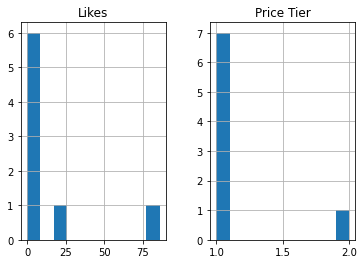

In [26]:
viz = dataSetResults[['Cusine','Price Tier','Likes','Longevity']]
viz.hist()


### Plot most popular price tier by borough